In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #warning
warnings.filterwarnings('ignore')

In [57]:
#Load Data as dataframe

df = pd.read_csv('loan.csv', low_memory=False)
pd.set_option('display.max_columns', None)

# Data Understanding

In [58]:
# Check the shape of the data

df.shape

(39717, 111)

In [59]:
# Check all the columns in the data

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [60]:
# Check the datatypes for each column

df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [61]:
# Check number of missing values for each column

df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [62]:
# Check all columns with all null values

missing_val_cols=df.columns[df.isna().sum()== df.shape[0]]

print(missing_val_cols)

print('Number of columns with missing values: ', missing_val_cols.size)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [63]:
# Checking the first 5 records

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [64]:
# Checking the number of unique data per column

df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [65]:
# Checking count of rows which have duplicate data

df.duplicated().sum()

0

# Data Cleaning and Manipulation

In [66]:
# Remove all the columns from the dataframe which have missing values

df_clean = df.drop(columns= missing_val_cols)

In [67]:
df_clean.shape

(39717, 57)

In [68]:
# Removing all columns which has 1 unique value

df_clean.drop(columns=df_clean.columns[df_clean.nunique()==1], inplace=True)

In [69]:
df_clean.shape

(39717, 48)

In [70]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [71]:
# Checking max missing values across all rows

df_clean.isna().sum(axis=1).max()

7

In [72]:
df_clean.columns.sort_values()

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
       'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url', 'verification_status',
       'zip_code'],
      dtype='object')

In [73]:
#Analysing url
df_clean.url.value_counts()

# Seems to have no relevance.Hence can be dropped from analysis

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

In [74]:
#Analysing title
df_clean.title.value_counts()

# Seems to be customer provided random text.Hence can be dropped from analysis

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [75]:
#Analysing desc
df_clean.desc.value_counts()

# Seems to be customer provided random text.Hence can be dropped from analysis

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

only first 3 digits of the Zipcode is provided. So this can be dropped.

In [76]:
# Dropping columns which has no relevance for charged off analysis

df_clean.drop(columns=['url', 'desc', 'title', 'zip_code','earliest_cr_line','issue_d'], inplace=True)

# Visualization Common Functions

In [77]:
# Custom method to draw histogram

def histogram(df, xlabel, ylabel, title,xattr,yattr=None, isKDE=True, hue=None, hue_order=None, bins=None):
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=xattr, y=yattr,kde=isKDE, hue=hue, hue_order=hue_order, bins=bins)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [78]:
# Custom method to draw histogram

def distplot(df, xlabel, ylabel,title,xattr, yattr=None, isKDE=True, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.displot(data=df, x=xattr, y=yattr,kde=isKDE, hue=hue, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [79]:
# Custom method to draw barplot

def barplot(df, xlabel, ylabel,title,xattr,displayOrder=None, yattr=None, isKDE=True, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=xattr, y=yattr, hue=hue, hue_order=hue_order, order=displayOrder)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [81]:
# Custom method to draw boxplot

# Box Plot
def boxplot(df, xlabel, ylabel, title, xattr=None,yattr=None, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=xattr, y=yattr, hue=hue, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Derived univariate analysis

In [82]:
def chargedOffLoanPercentageUnivariate(df, attr):
    # Filtering out all loan data which is "Fully paid"
    df_fp =df[df.loan_status=="Fully Paid"]

    #Filtering out all loan data which is "Charged Off"
    df_co =df[df.loan_status=="Charged Off"]
    
    # Group all the "Fully Paid" loan data by home ownership and calculate the occurance count

    df_fp_attr = df_fp.groupby(by=attr, sort=True)["id"].count().reset_index()

    # Group all the "Charged off" loan data by home ownership and calculate the occurance count
    df_co_attr = df_co.groupby(by=attr, sort=True)["id"].count().reset_index()

    #Indexing the dataframes on home_ownership
    df_fp_attr.set_index(attr, inplace=True)
    df_co_attr.set_index(attr, inplace=True)
    
    #Adding the full paid group by home ownership count to charged off dataframe
    df_co_attr["fully paid"] = df_fp_attr["id"]
    #calculate the percentage of "charged off" loans count on total "charged off" and "fully paid" loan count  
    df_co_attr["charged off percentage"]= df_co_attr.apply(lambda x: x["id"]*100/(x["fully paid"]+x["id"]), axis=1)
    df_co_attr.reset_index(inplace=True)
    df_co_attr.rename(columns = {'id':'charged off'}, inplace = True)
    print(df_co_attr)
    
    return df_co_attr



## IQR Analysis

In [111]:
def iqrAnalysis(df_c,attr):
    print("Analysis of '", attr,"'")
    print("-------------------------")
    print("Median  for loan borrowers for Fully Paid loans", np.quantile(df_c[df_c["loan_status"]=="Fully Paid"][attr],0.5))
    print("Median annual salary for loan borrowers for Charged Off loans", np.quantile(df_c[df_c["loan_status"]=="Charged Off"][attr],0.5))
    print("IQR for Fully Paid loans",  np.quantile(df_c[df_c["loan_status"]=="Fully Paid"][attr],0.75),"-", np.quantile(df_c[df_c["loan_status"]=="Fully Paid"][attr],0.25))
    print("IQR for Charged Off loans",  np.quantile(df_c[df_c["loan_status"]=="Charged Off"][attr],0.75),"-", np.quantile(df_c[df_c["loan_status"]=="Charged Off"][attr],0.25))

# Univariate Analysis

## loan_status

- Current status of the loan

- <b><i>This is a unordered categorical variable</i></b>

In [83]:
# Checking all loan status

df_clean.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [84]:
df_clean.shape

(39717, 43)

In [85]:
# Removing all loan status which are in currently in progress as these wont be used for analysis.

df_clean = df_clean[~(df_clean.loan_status == "Current")]

In [86]:
df_clean.shape

(38577, 43)

## Customer Attributes

### 1. addr_state - 
The state provided by the borrower in the loan application

<b><i>This is a unordered categorical variable.</i></b>

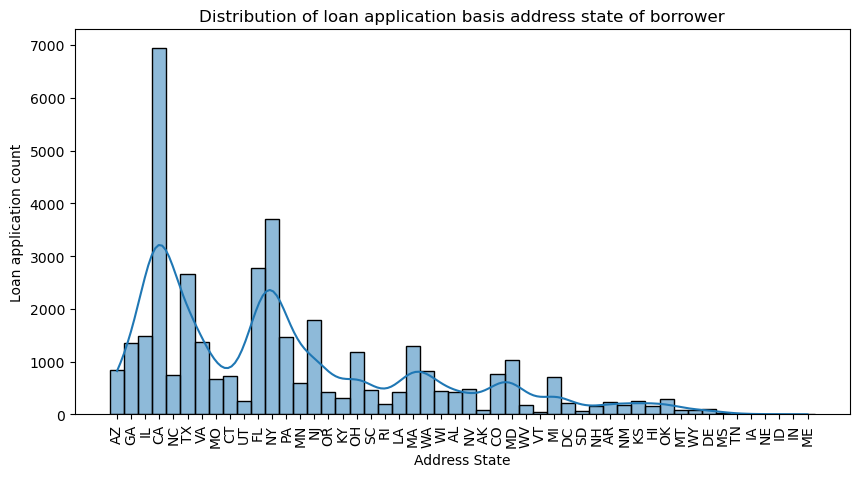

In [88]:
attr = "addr_state"

# Loan application count vs Address State of borrower
histogram(df_clean,"Address State","Loan application count", "Distribution of loan application basis address state of borrower", attr)

In [89]:
df_clean.groupby(by="addr_state", sort=True)["addr_state"].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False).reset_index()

,index,addr_state,Count
0,4,CA,6949
1,33,NY,3698
2,9,FL,2781
3,42,TX,2659
4,30,NJ,1790
5,14,IL,1478
6,37,PA,1468
7,44,VA,1369
8,10,GA,1359
9,19,MA,1297


In [92]:
# Group the loan application loan basis the address state

df_state = df_clean.groupby(by="addr_state", sort=True)["addr_state"].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
df_state.reset_index(drop=True)


,addr_state,Count
0,CA,6949
1,NY,3698
2,FL,2781
3,TX,2659
4,NJ,1790
5,IL,1478
6,PA,1468
7,VA,1369
8,GA,1359
9,MA,1297


   addr_state  charged off  fully paid  charged off percentage
0          AK           15          63               19.230769
1          AL           54         381               12.413793
2          AR           27         208               11.489362
3          AZ          123         726               14.487633
4          CA         1125        5824               16.189380
5          CO           98         668               12.793734
6          CT           94         632               12.947658
7          DC           15         196                7.109005
8          DE           12         101               10.619469
9          FL          504        2277               18.122977
10         GA          215        1144               15.820456
11         HI           28         138               16.867470
12         ID            1           5               16.666667
13         IL          197        1281               13.328823
14         KS           31         224               12

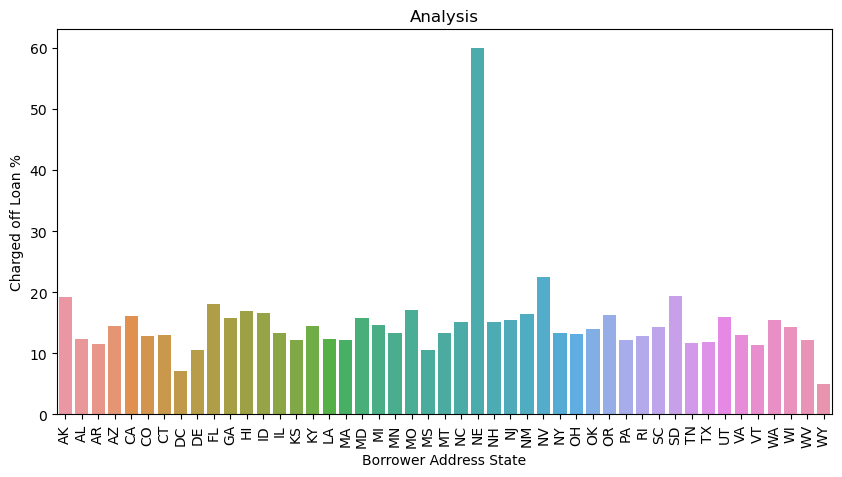

In [94]:
df_co_as=chargedOffLoanPercentageUnivariate(df_clean, "addr_state")

# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_as, xattr="addr_state", yattr="charged off percentage", xlabel="Borrower Address State", ylabel="Charged off Loan %", title="Analysis")


### Analysis -

- All address state except NE has a low charged off loan percentage.
- Additionally even though NE has a high percentage, the total number of loans from NE is just 3 out of which 2 have charged off. This loan count is too low for a period of 4 years (2007-2011) to make any meaningful pattern out of it. Thus can be ignored.

### 2. annual_inc - 

Annual Income of the borrower.

<b><i>This is a quantitative categorical variable.</i></b>

<Figure size 1000x500 with 0 Axes>

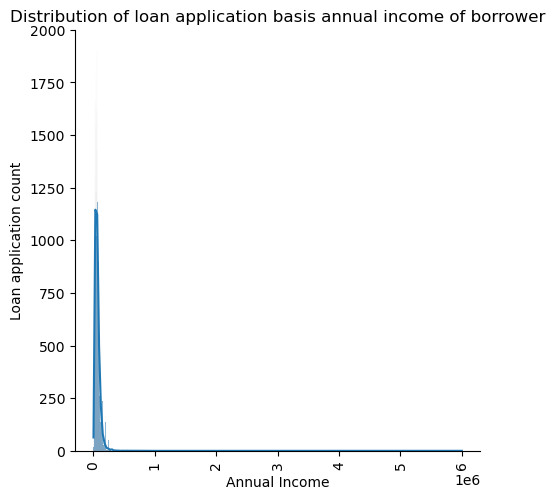

In [96]:
# Distribution of loan application count basis the annual income of borrower

distplot(df_clean,"Annual Income","Loan application count", "Distribution of loan application basis annual income of borrower", "annual_inc")


In [97]:
df_clean.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [98]:
df_clean.shape

(38577, 43)

In [99]:
# Above analysis on the annual income shows the data is skewed. So removing the outliers. 

q3, q1 = np.percentile(df_clean["annual_inc"], [90 ,10])
print("90 percentile of borrowers annual income ", q3)
print("10 percentile of borrowers annual income ", q1)
iqr = q3 - q1
outliers = q3 + 1.5*iqr

# Extracting the data excluding the annual income outliers
df_c = df_clean[df_clean["annual_inc"]<outliers]

90 percentile of borrowers annual income  115000.0
10 percentile of borrowers annual income  30000.0


In [100]:
df_c.shape

(38228, 43)

In [101]:
df_c.annual_inc.describe()

count     38228.000000
mean      65481.178611
std       35543.927181
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80459.742500
max      242400.000000
Name: annual_inc, dtype: float64

<Figure size 1000x500 with 0 Axes>

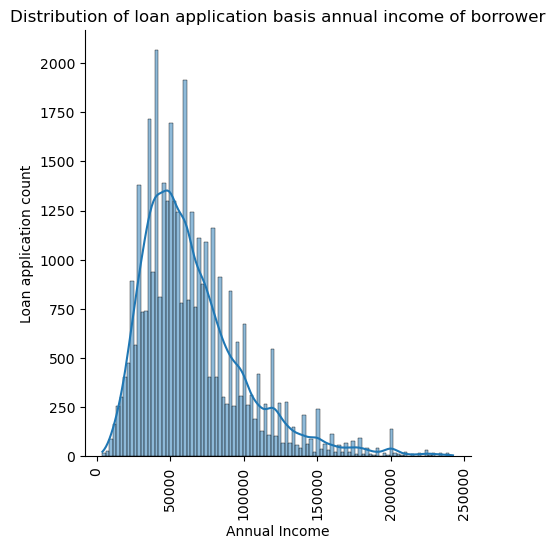

In [108]:
# Distribution of loan application count basis the annual income of borrower after removing outliers

distplot(df_c,"Annual Income","Loan application count", "Distribution of loan application basis annual income of borrower", "annual_inc")

<b>The above analysis shows the density distribution of a borrower basis his annual income. It shows annual income range of 40k to 80k has the maximum density of locan application count.</b>

##### Segmented Univariate Analysis

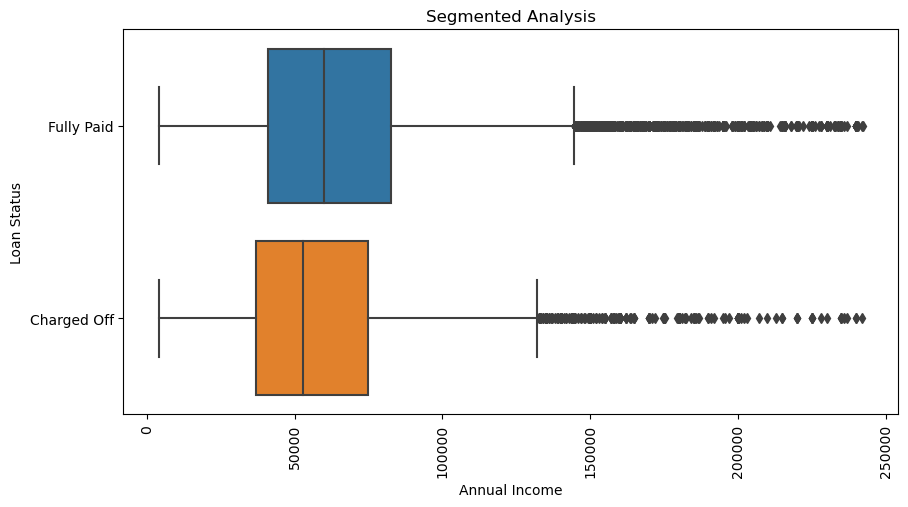

In [110]:
attr = 'annual_inc'

#Box plot after removing the outliers

boxplot(df_c, xlabel='Annual Income', ylabel="Loan Status", title="Segmented Analysis" , xattr=attr,yattr="loan_status")


In [112]:
iqrAnalysis(df_c,attr)

Analysis of ' annual_inc '
-------------------------
Median  for loan borrowers for Fully Paid loans 60000.0
Median annual salary for loan borrowers for Charged Off loans 52910.0
IQR for Fully Paid loans 82506.0 - 41000.0
IQR for Charged Off loans 75000.0 - 37000.0


### 3. home_ownership

- The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
    
- <b><i>This is unordered categorical data.</i></b>

<Figure size 1000x500 with 0 Axes>

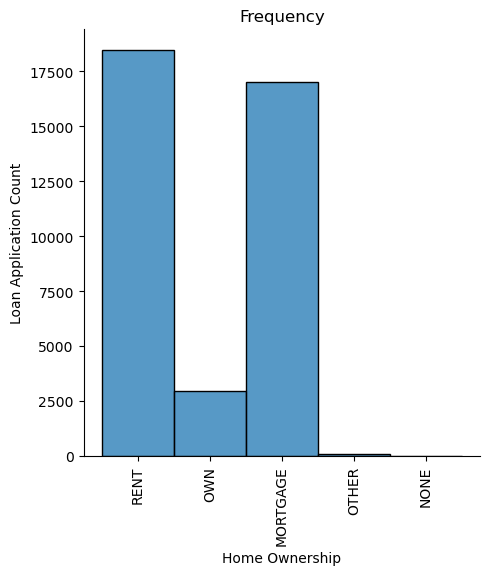

In [114]:
# Distribution Plot for loan application count based on Home Ownership

distplot(df_clean, "Home Ownership", "Loan Application Count", "Frequency","home_ownership", isKDE=False)

<b>Analysis -

Borrowers who donot have own a property tend to apply for loan more than who own thier own house.

  home_ownership  charged off  fully paid  charged off percentage
0       MORTGAGE         2327       14694               13.671347
1          OTHER           18          80               18.367347
2            OWN          443        2532               14.890756
3           RENT         2839       15641               15.362554


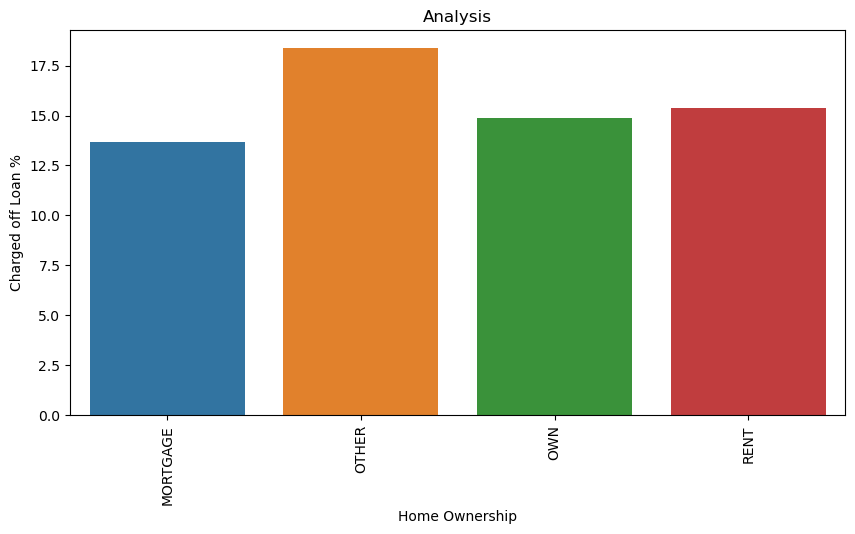

In [119]:
attr="home_ownership"
# Analysing charged off loan status against home ownership

df_co = chargedOffLoanPercentageUnivariate(df_clean, attr)

# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co, xattr=attr, yattr="charged off percentage", xlabel="Home Ownership", ylabel="Charged off Loan %", title="Analysis")

#### Analysis 

This shows that home ownership does not have any significant impact on loan being charged off.

### 4. emp_length

- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

- <b><i>This is a ordered categorical variable.</i></b>

In [120]:
df_clean.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [121]:
# deriving emp_length_number column by converting string in "emp_length" to ordered categorical integer variable
# Considering that employment length of 10 represents all employment length of 10+ years
# Considering that employement length of 0 represents all employment length of <1 year
df_clean["emp_length_number"]= df_clean.emp_length.apply(lambda x: str(x).replace(' years','').replace('+','').replace('< 1','0').replace(' year',''))


In [124]:
df_clean.emp_length.isna().sum()

1033

In [125]:
# employee length dataframe excluding the records without emp_length information
df_el= df_clean[~df_clean.emp_length.isna()]


In [126]:
# Derived Column

# Converting emp_length_number to int
df_el["emp_length_number"]= df_el.emp_length_number.apply(lambda x: int(x))

In [127]:
df_el.emp_length_number.value_counts()

10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length_number, dtype: int64

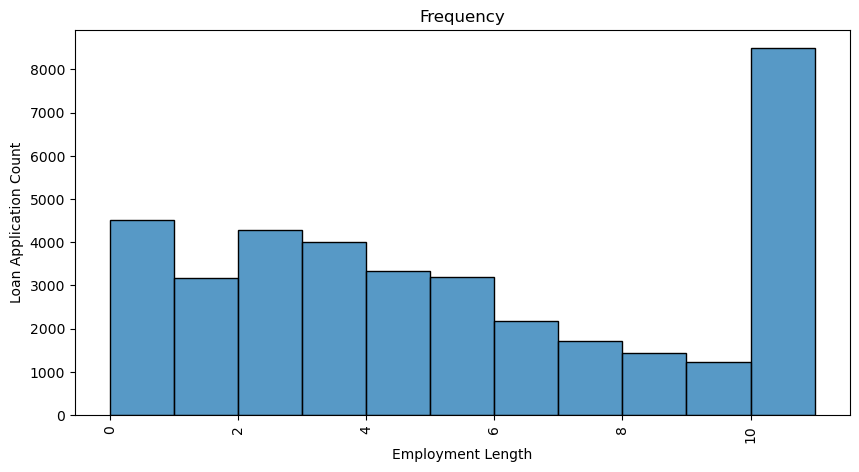

In [128]:
# Count of loan application vs employment length of a borrower
histogram(df_el,"Employment Length", "Loan Application Count", "Frequency","emp_length_number", isKDE=False, bins=np.arange(0,12))


    emp_length_number  charged off  fully paid  charged off percentage
0                   0          639        3869               14.174800
1                   1          456        2713               14.389397
2                   2          567        3724               13.213703
3                   3          555        3457               13.833500
4                   4          462        2880               13.824057
5                   5          458        2736               14.339386
6                   6          307        1861               14.160517
7                   7          263        1448               15.371128
8                   8          203        1232               14.146341
9                   9          158        1068               12.887439
10                 10         1331        7157               15.680961


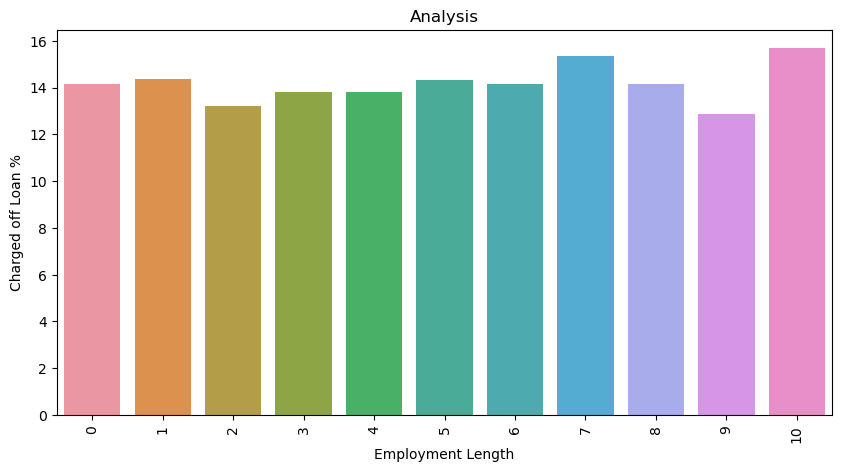

In [129]:
attr = 'emp_length_number'
# Analysing charged off loan status against employment length

df_co= chargedOffLoanPercentageUnivariate(df_el, attr)

# Box plot to analyze how employment length can affect the loan status getting defaulted.

barplot(df_co, xattr=attr, yattr="charged off percentage", xlabel="Employment Length", ylabel="Charged off Loan %", title="Analysis")


#### Analysis -
- <b><i>The barplot shows there is negligible effect of employee length on the loan status becoming charged off.

## Loan Attributes

### 1. Grade and sub_grade

- Loan grades are set based on both the borrower’s credit profile and the nature of the contract. 'A' grade loans represent the lowest risk while 'G' grade loans are the riskiest.
- Grade -> LC assigned loan grade
- sub_grade -> LC assigned loan subgrade
- <b><i>This are unordered categorical variable.</i></b>

In [131]:
df_clean.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [132]:
df_clean.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [133]:
# Checking relation between grade and subgrade

df_clean[df_clean["grade"] == "A"]["sub_grade"].value_counts()
#df_clean[df_clean["grade"] == "B"]["sub_grade"].value_counts()
#df_clean[df_clean["grade"] == "C"]["sub_grade"].value_counts()

A4    2873
A5    2715
A3    1810
A2    1508
A1    1139
Name: sub_grade, dtype: int64

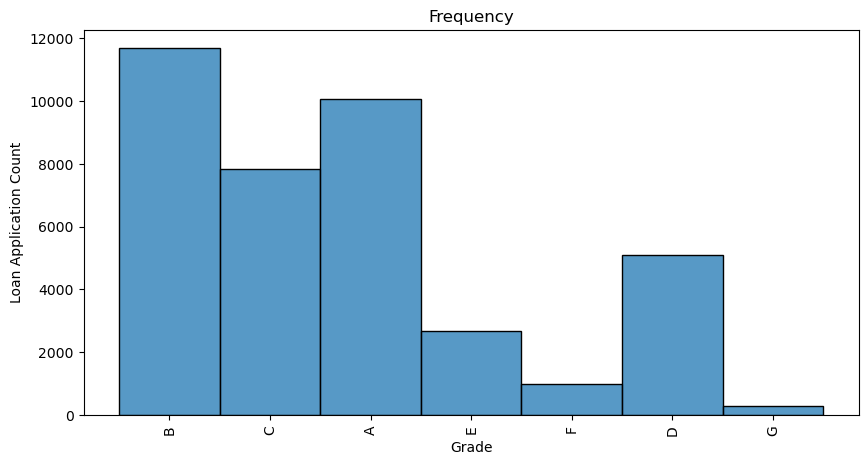

In [134]:
histogram(df_clean,"Grade", "Loan Application Count", "Frequency","grade", isKDE=False)

  grade  charged off  fully paid  charged off percentage
0     A          602        9443                5.993031
1     B         1425       10250               12.205567
2     C         1347        6487               17.194281
3     D         1118        3967               21.986234
4     E          715        1948               26.849418
5     F          319         657               32.684426
6     G          101         198               33.779264


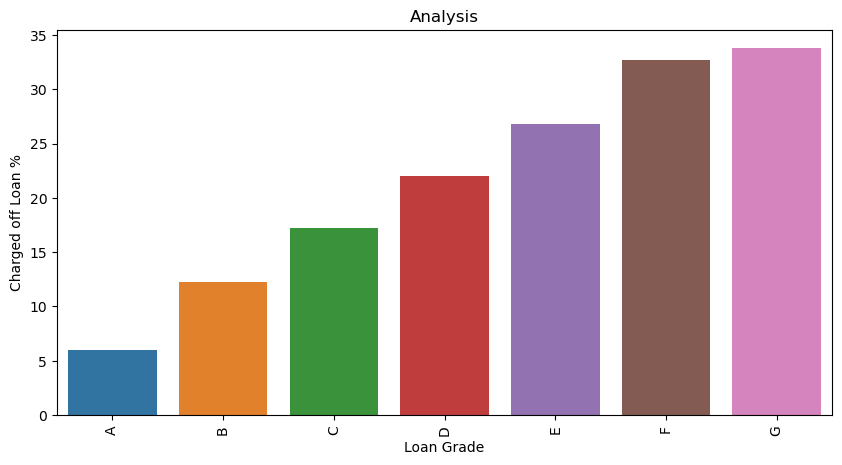

In [135]:
attr = 'grade'

df_co = chargedOffLoanPercentageUnivariate(df_clean, attr)

# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co, xattr=attr, yattr="charged off percentage", xlabel="Loan Grade", ylabel="Charged off Loan %", title="Analysis")


#### Analysis:

- On overall grade analysis, the charged off loan percent is highest for grade G(highest riskier) and least in grade A(lowest risk).
- The trend of charged off loan % against grade is a increasing order from grade A(lowest risk) to grade G(highest risk).

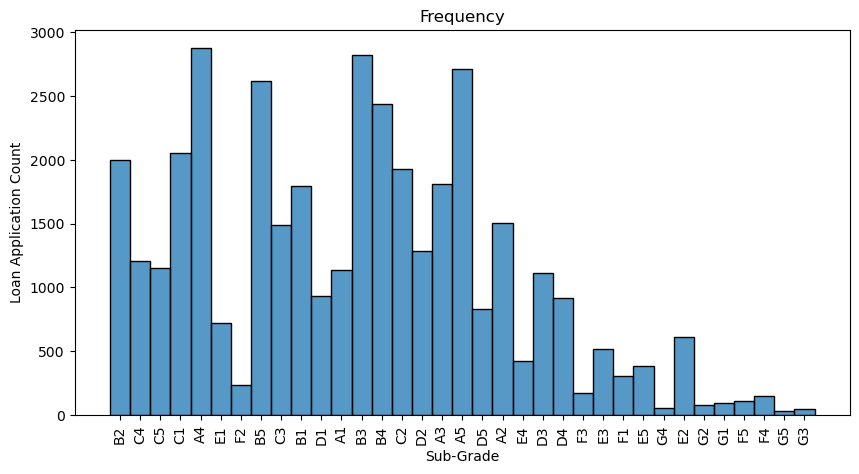

In [137]:
# Distribution of loan applications based on sub-grade

histogram(df_clean,"Sub-Grade", "Loan Application Count", "Frequency","sub_grade", isKDE=False)


   sub_grade  charged off  fully paid  charged off percentage
0         A1           30        1109                2.633889
1         A2           74        1434                4.907162
2         A3          103        1707                5.690608
3         A4          178        2695                6.195614
4         A5          217        2498                7.992634
5         B1          171        1626                9.515860
6         B2          228        1773               11.394303
7         B3          341        2484               12.070796
8         B4          329        2108               13.500205
9         B5          356        2259               13.613767
10        C1          336        1719               16.350365
11        C2          321        1610               16.623511
12        C3          270        1218               18.145161
13        C4          212         994               17.578773
14        C5          208         946               18.024263
15      

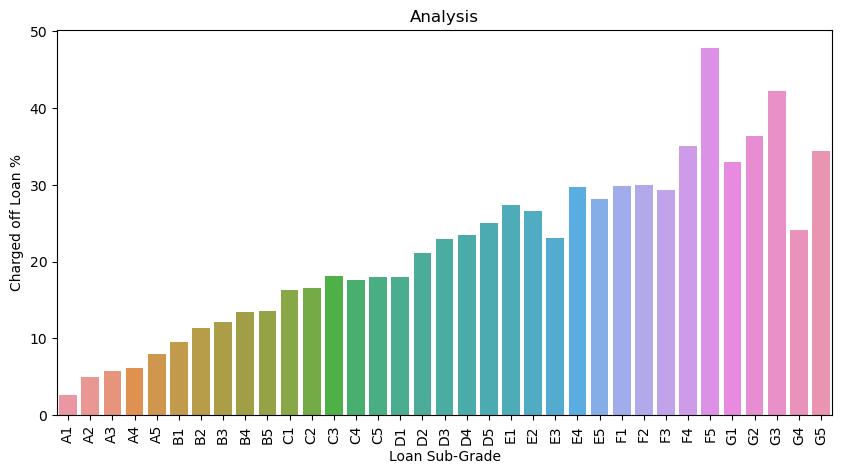

In [139]:
attr = 'sub_grade'

df_co = chargedOffLoanPercentageUnivariate(df_clean, attr)

# Box plot to analyze how subgrade can affect the loan status getting defaulted.

barplot(df_co, xattr=attr, yattr="charged off percentage", xlabel="Loan Sub-Grade", ylabel="Charged off Loan %", title="Analysis")


#### Analysis:

On overall grade analysis
- The charged off loan percent is highest for grade G and least in grade A.
- The trend of charged off loan % against grade is a increasing order from grade A to grade G.

On overall subgrade analysis
- The charged off loan percent is highest for F5 and then G3.

### 2. verification_status

- Indicates if income was verified by LC, not verified, or if the income source was verified
- <b><i>This is a unordered categorical variable.</i></b>

In [140]:
df_clean.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

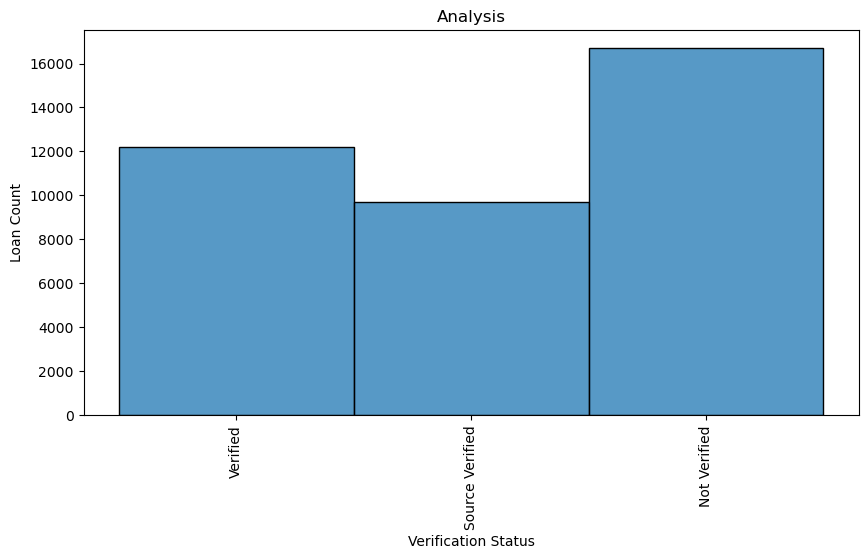

In [141]:
# Box plot to analyze how income verification status can affect the loan status getting defaulted.

histogram(df_clean, xattr="verification_status", xlabel="Verification Status", ylabel="Loan Count", title="Analysis", isKDE=False)


  verification_status  charged off  fully paid  charged off percentage
0        Not Verified         2142       14552               12.830957
1     Source Verified         1434        8243               14.818642
2            Verified         2051       10155               16.803212


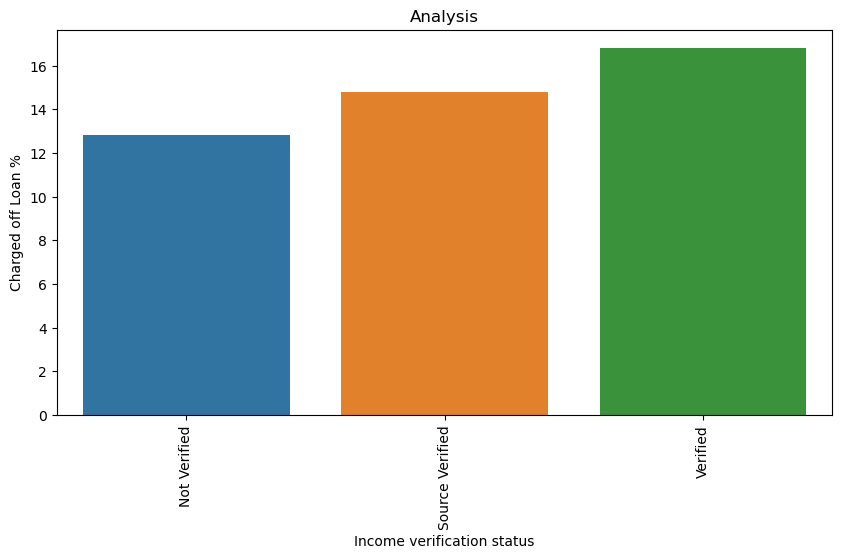

In [142]:
attr = 'verification_status'

df_co_vs = chargedOffLoanPercentageUnivariate(df_clean, attr)

# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_vs, xattr=attr, yattr="charged off percentage", xlabel="Income verification status", ylabel="Charged off Loan %", title="Analysis")


### Analysis:
  
- Number of loan application count basis verification status shows maximum number of loan applications donot have income verified.
- There is no major trend in the charged off loan acount % vs income verification status, but it is marginally higher for cases where the income source is verified. Since this is a minor % change, this should be ignored.

### 3. purpose

- A category provided by the borrower for the loan request. 

- <b><i>This is a unordered categorical variable.</i></b>

In [143]:
df_clean.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

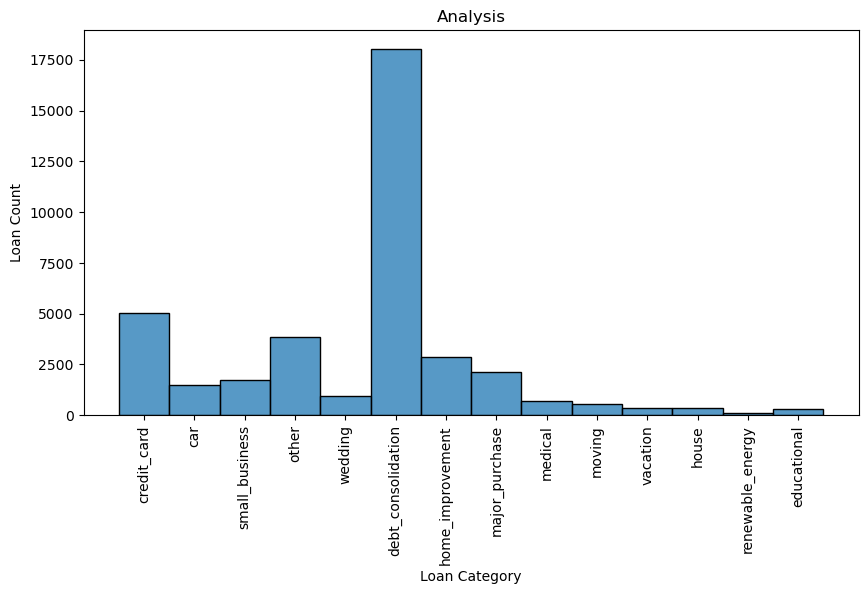

In [146]:
attr = 'purpose'
# Histogram plot to analyze how loan purpose category can affect the loan status getting defaulted.

histogram(df_clean, xattr="purpose", xlabel="Loan Category", ylabel="Loan Count", title="Analysis", isKDE=False)


               purpose  charged off  fully paid  charged off percentage
0                  car          160        1339               10.673783
1          credit_card          542        4485               10.781778
2   debt_consolidation         2767       15288               15.325395
3          educational           56         269               17.230769
4     home_improvement          347        2528               12.069565
5                house           59         308               16.076294
6       major_purchase          222        1928               10.325581
7              medical          106         575               15.565345
8               moving           92         484               15.972222
9                other          633        3232               16.377749
10    renewable_energy           19          83               18.627451
11      small_business          475        1279               27.080958
12            vacation           53         322               14

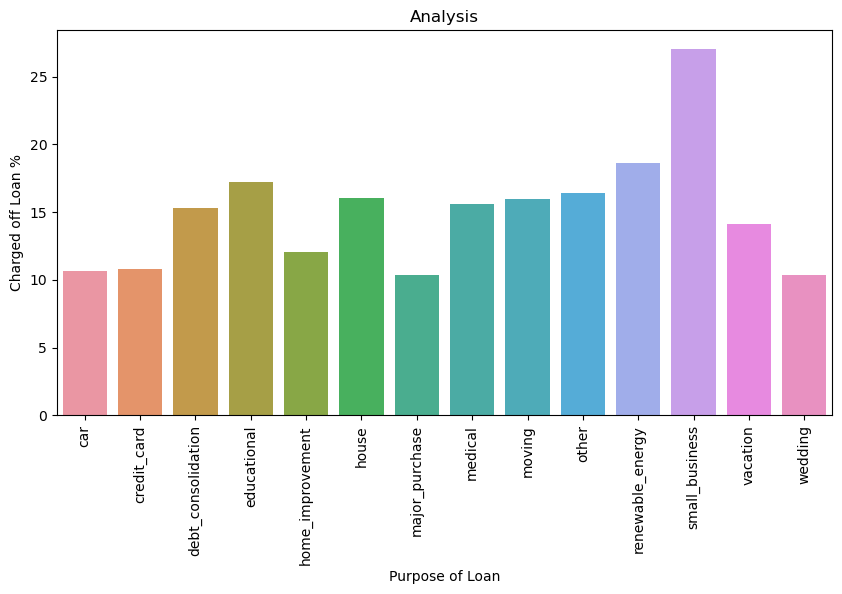

In [147]:
# Analysing charged off loan status against home ownership

df_co= chargedOffLoanPercentageUnivariate(df_clean, attr)

# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co, xattr=attr, yattr="charged off percentage", xlabel="Purpose of Loan", ylabel="Charged off Loan %", title="Analysis")


### Analysis:
  
- Number of loan application count basis loan category(purpose) shows maximum number of loan applications are for debt consolidation.
- There is no major trend in the charged off loan acount % vs loan category(purpose), except it is higher for cases where the loan category is "small business" which is at 27% compared to next highest as 18% for renewable energy.

### 5. dti

- Debt-to-income (DTI) ratio is the percentage of your gross monthly income that is used to pay your monthly debt and determines your borrowing risk.
- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- <b><i>This is a quantitative categorical variable.</i></b>

In [148]:
df_clean.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

In [150]:
# Derived DTI column by rounding off
# Adding a modified dti column

df_clean["dti_mod"] = df.dti.apply(lambda x: np.round(x))


In [152]:
df_clean["dti_mod"].describe()

count    38577.000000
mean        13.273220
std          6.684078
min          0.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         30.000000
Name: dti_mod, dtype: float64

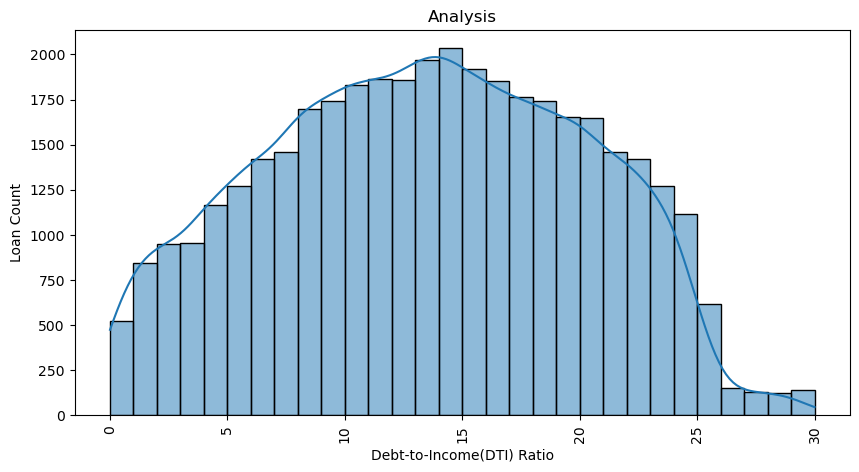

In [153]:
# Histogram plot to analyze how dti can affect the loan status getting defaulted.

histogram(df_clean, xattr="dti_mod", xlabel="Debt-to-Income(DTI) Ratio", ylabel="Loan Count", title="Analysis", isKDE=True, bins=30)


#### Segmented Univariate Analysis

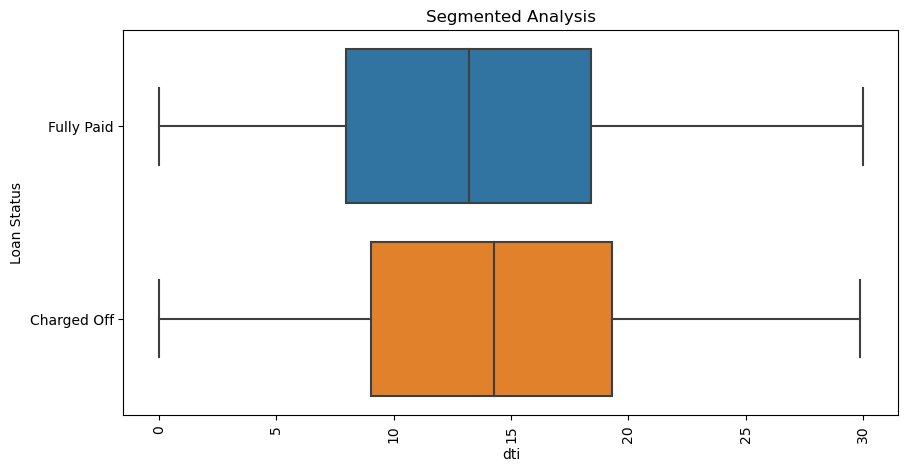

In [154]:
# Box plot to analyze how dti can affect the loan getting defaulted.

boxplot(df_clean, xlabel="dti", ylabel="Loan Status", title="Segmented Analysis" , xattr="dti",yattr="loan_status")


In [155]:
df_fp_dti = df_clean[df_clean.loan_status=="Fully Paid"]["dti"]

df_fp_dti.describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [156]:
df_co_dti = df_clean[df_clean.loan_status=="Charged Off"]["dti"]

df_co_dti.describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [157]:
### Analysis 
iqrAnalysis(df_clean, 'dti')

print("- Above data shows the loan accounts with dti higher has higher chances to being Charged Off, although the margin is just 1% in the IQR range")


Analysis of ' dti '
-------------------------
Median  for loan borrowers for Fully Paid loans 13.2
Median annual salary for loan borrowers for Charged Off loans 14.29
IQR for Fully Paid loans 18.39 - 7.98
IQR for Charged Off loans 19.29 - 9.05
- Above data shows the loan accounts with dti higher has higher chances to being Charged Off, although the margin is just 1% in the IQR range


#### inq_last_6mths

- The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

- <b><i>This is a quantitative categorical variable.</i></b>

In [158]:
df_clean.inq_last_6mths.value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

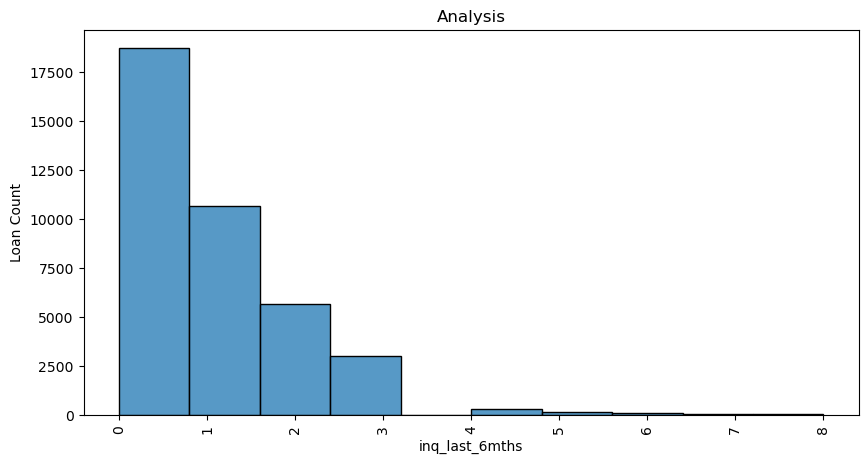

In [159]:
histogram(df_clean, xattr="inq_last_6mths", xlabel="inq_last_6mths", ylabel="Loan Count", title="Analysis", isKDE=False, bins=10)

In [160]:
df_fp_inq = df_clean[df_clean.loan_status=="Fully Paid"]["inq_last_6mths"]

df_fp_inq.describe()

count    32950.000000
mean         0.839909
std          1.053524
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [162]:
df_co_inq = df_clean[df_clean.loan_status=="Charged Off"]["inq_last_6mths"]

df_co_inq.describe()

count    5627.000000
mean        1.058113
std         1.154136
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inq_last_6mths, dtype: float64

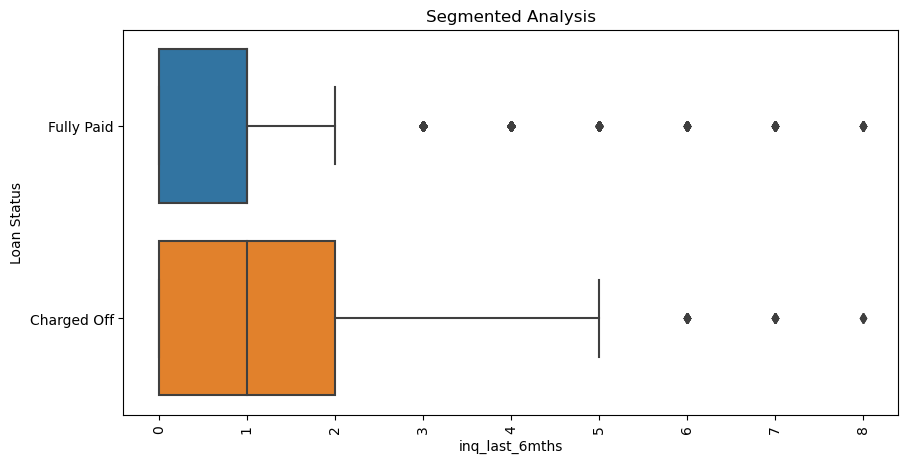

In [163]:
# Box plot to analyze how dti can affect the loan getting defaulted.

boxplot(df_clean, xlabel="inq_last_6mths", ylabel="Loan Status", title="Segmented Analysis" , xattr="inq_last_6mths",yattr="loan_status")


In [164]:
### Analysis 
iqrAnalysis(df_clean, 'inq_last_6mths')

print("- Above data shows the loan accounts with inq_last_6mths higher has higher chances to being Charged Off (excluding the outliers)")


Analysis of ' inq_last_6mths '
-------------------------
Median  for loan borrowers for Fully Paid loans 1.0
Median annual salary for loan borrowers for Charged Off loans 1.0
IQR for Fully Paid loans 1.0 - 0.0
IQR for Charged Off loans 2.0 - 0.0
- Above data shows the loan accounts with inq_last_6mths higher has higher chances to being Charged Off (excluding the outliers)


### 6. mths_since_last_delinq

- The number of months since the borrower's last delinquency.

- <b><i>This is a ordered categorical variable.</i></b>

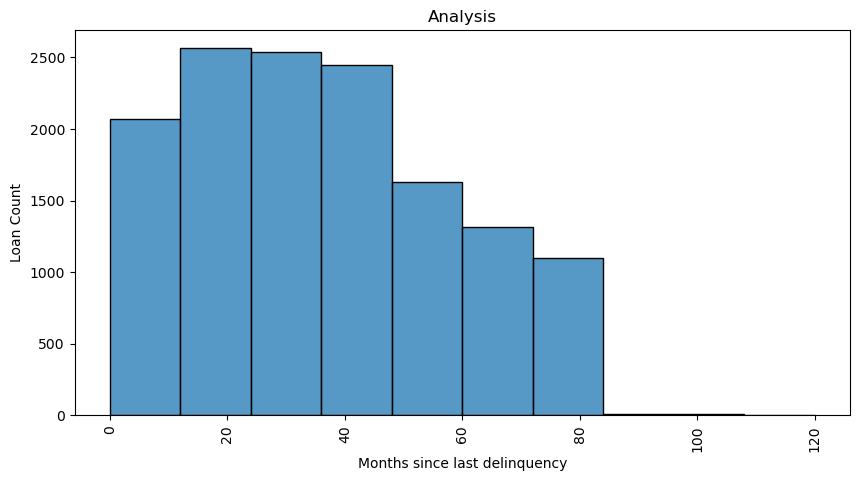

In [165]:
# Graph to Loan account counts against the count of months since last deliquency
histogram(df_clean, xattr="mths_since_last_delinq", xlabel="Months since last delinquency", ylabel="Loan Count", title="Analysis", isKDE=False, bins=10)

    mths_since_last_delinq  charged off  fully paid  charged off percentage
0                      0.0           67       376.0               15.124153
1                      1.0            6        23.0               20.689655
2                      2.0           17        84.0               16.831683
3                      3.0           20       123.0               13.986014
4                      4.0           25       122.0               17.006803
..                     ...          ...         ...                     ...
81                    81.0           16        74.0               17.777778
82                    82.0           13        41.0               24.074074
83                    83.0            2         3.0               40.000000
84                    97.0            1         NaN                     NaN
85                   107.0            1         NaN                     NaN

[86 rows x 4 columns]


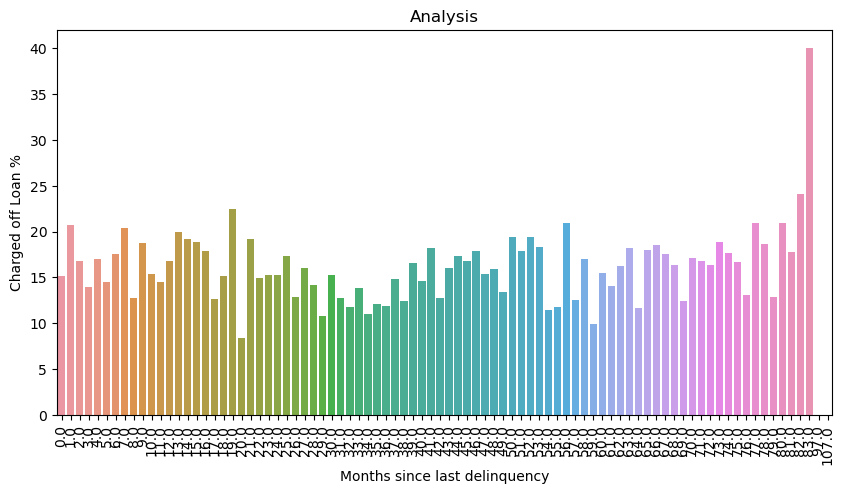

In [166]:
df_co_mld = chargedOffLoanPercentageUnivariate(df_clean, "mths_since_last_delinq")

# Box plot to analyze how loan category can affect the loan status getting defaulted.

barplot(df_co_mld, xattr="mths_since_last_delinq", yattr="charged off percentage", xlabel="Months since last delinquency", ylabel="Charged off Loan %", title="Analysis")

#### Analysis -

- The barplot clearly shows that Months since last delinquency has no effect on the loan status turning "Charged Off".
- Charged off loan % is highest 40% at months count since last delinquency as 83. But number of total loan application is just 5 where 2 have been charged off. So this can be ignored.

### 7. open_acc

- The number of open credit lines in the borrower's credit file.

- <b><i>This is a quantitative categorical variable.</i></b>

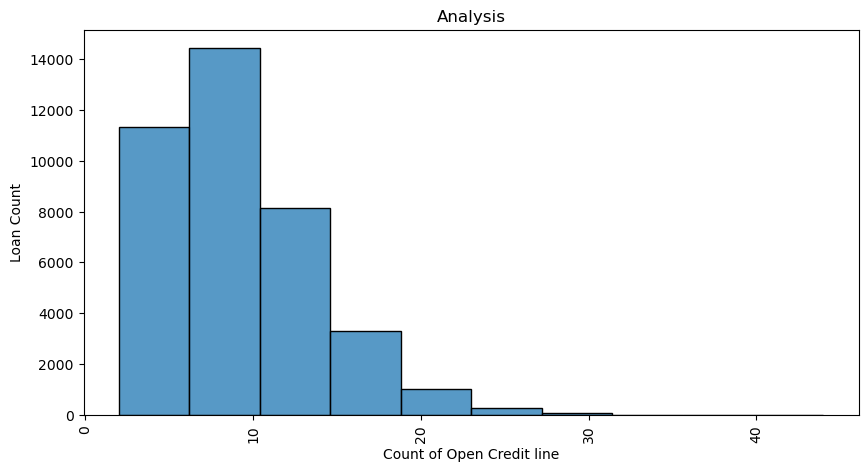

In [169]:
# Graph to Loan account counts against the count of months since last deliquency
histogram(df_clean, xattr="open_acc", xlabel="Count of Open Credit line", ylabel="Loan Count", title="Analysis", isKDE=False, bins=10)

    open_acc  charged off  fully paid  charged off percentage
0          2          127       469.0               21.308725
1          3          258      1212.0               17.551020
2          4          364      1936.0               15.826087
3          5          425      2686.0               13.661202
4          6          543      3303.0               14.118565
5          7          557      3352.0               14.249169
6          8          546      3268.0               14.315679
7          9          518      3089.0               14.360965
8         10          465      2632.0               15.014530
9         11          382      2284.0               14.328582
10        12          301      1897.0               13.694268
11        13          263      1592.0               14.177898
12        14          217      1210.0               15.206727
13        15          168       978.0               14.659686
14        16          105       803.0               11.563877
15      

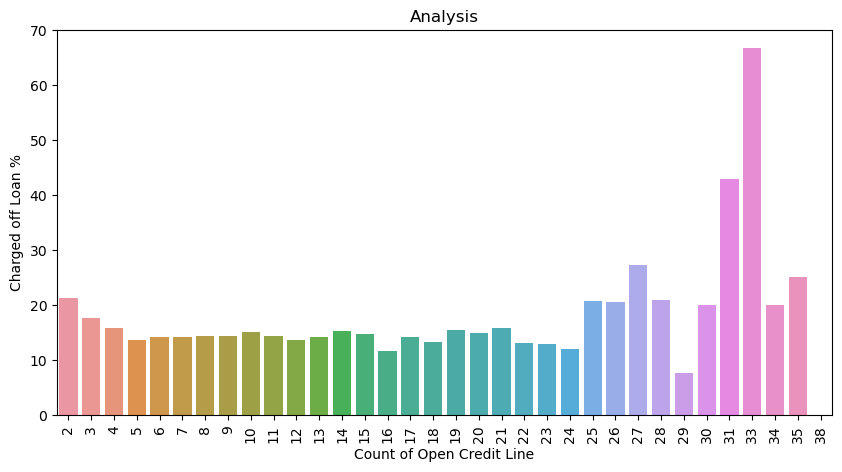

In [170]:
df_co_oa = chargedOffLoanPercentageUnivariate(df_clean, "open_acc")

# Box plot to analyze how loan category can affect the loan status getting defaulted.

barplot(df_co_oa, xattr="open_acc", yattr="charged off percentage", xlabel="Count of Open Credit Line", ylabel="Charged off Loan %", title="Analysis")

#### Analysis -

- With the increase in count of open credit line, there is a clear increase in charged off loan % but the count of 
- The barplot clearly shows that number of open credit lines for borrower has no effect on the loan status turning "Charged Off".

### 7. mths_since_last_record

- The number of months since the last public record.

- <b><i>This is a ordered categorical variable.</i></b>

In [171]:
df_clean.mths_since_last_record.value_counts()

0.0      670
104.0     60
113.0     58
89.0      57
111.0     56
        ... 
14.0       1
46.0       1
7.0        1
83.0       1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64

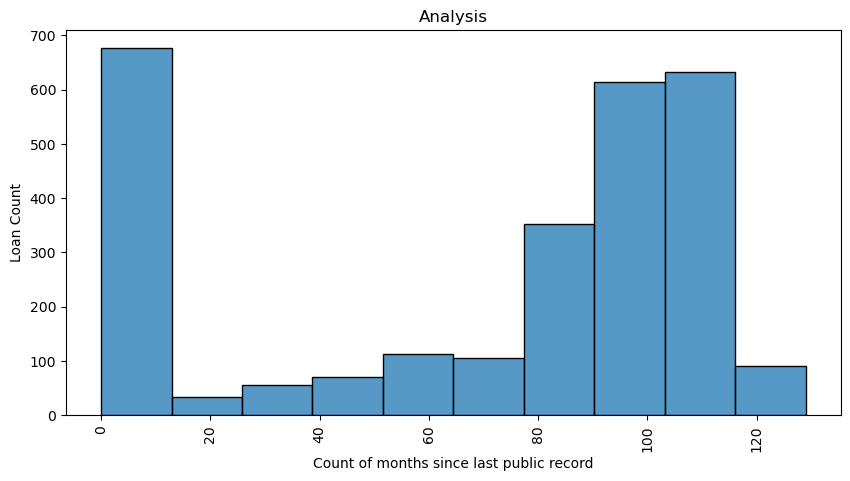

In [172]:
# Graph to Loan account counts against the count of months since last deliquency
histogram(df_clean, xattr="mths_since_last_record", xlabel="Count of months since last public record", ylabel="Loan Count", title="Analysis", isKDE=False, bins=10)

    mths_since_last_record  charged off  fully paid  charged off percentage
0                      0.0          111       559.0               16.567164
1                      7.0            1         NaN                     NaN
2                     12.0            1         NaN                     NaN
3                     17.0            1         2.0               33.333333
4                     18.0            1         1.0               50.000000
..                     ...          ...         ...                     ...
83                   116.0           10        31.0               24.390244
84                   117.0            7        36.0               16.279070
85                   118.0            9        27.0               25.000000
86                   119.0            2         7.0               22.222222
87                   129.0            1         NaN                     NaN

[88 rows x 4 columns]


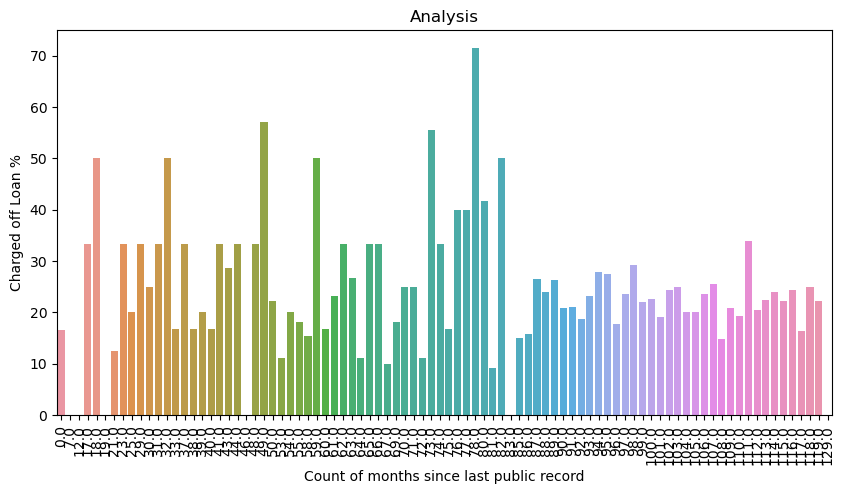

In [173]:
df_co_mlr = chargedOffLoanPercentageUnivariate(df_clean, "mths_since_last_record")

# Box plot to analyze how loan category can affect the loan status getting defaulted.

barplot(df_co_mlr, xattr="mths_since_last_record", yattr="charged off percentage", xlabel="Count of months since last public record", ylabel="Charged off Loan %", title="Analysis")

### Analysis

- Count of months since last public record has clearly no pattern/impact on loan account status turning "Charged off"

### 8. pub_rec

- Number of derogatory public records. Derogatory public records are those that contain negative information such as bankruptcies and liens.

- <b><i>This is a ordered categorical variable.</i></b>

In [174]:
df_clean.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [175]:
attr = "pub_rec"

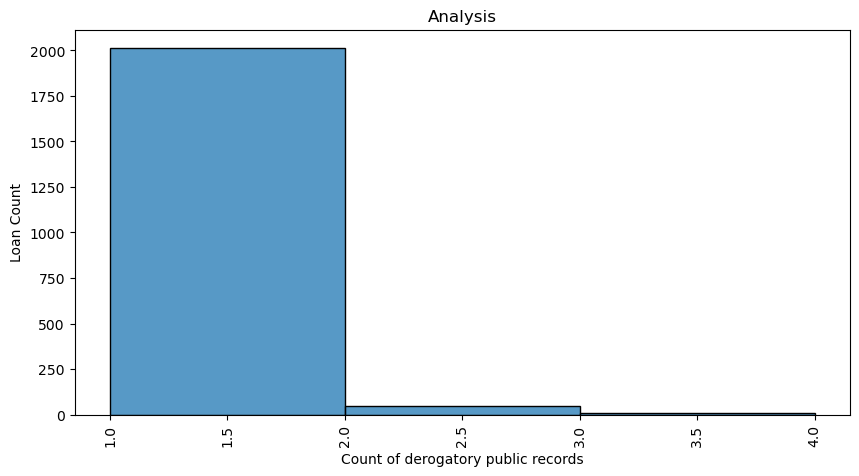

In [176]:
# Graph to Loan account counts against the count of public records
histogram(df_clean, xattr=attr, xlabel="Count of derogatory public records", ylabel="Loan Count", title="Analysis", isKDE=False, bins=[1,2,3,4])

   pub_rec  charged off  fully paid  charged off percentage
0        0         5160       31347               14.134276
1        1          457        1556               22.702434
2        2           10          38               20.833333


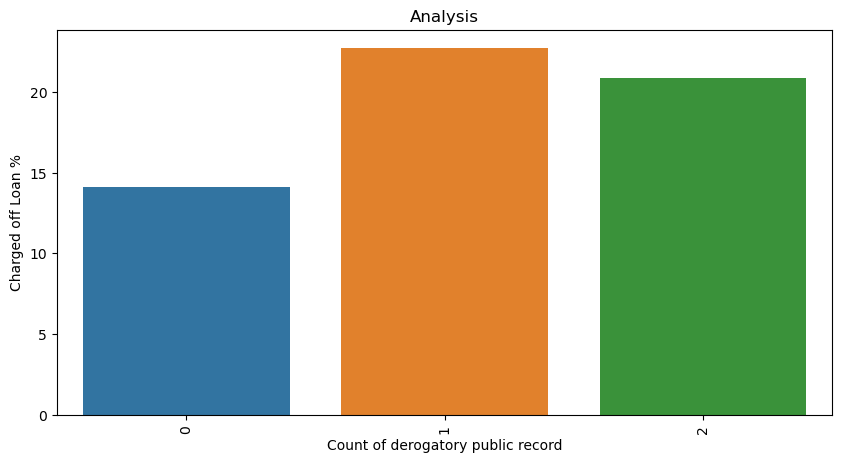

In [177]:
df_co_dpr = chargedOffLoanPercentageUnivariate(df_clean, attr)

# Box plot to analyze how loan category can affect the loan status getting defaulted.

barplot(df_co_dpr, xattr=attr, yattr="charged off percentage", xlabel="Count of derogatory public record", ylabel="Charged off Loan %", title="Analysis")

### Analysis -

- Charged off loan account count % is higher for borrowers having public derogratory records than who dont have. But the difference is minor.

### 9. revol_bal

- Total credit revolving balance

- <b><i>This is a quantitative categorical variable.</i></b>

In [178]:
df_clean.revol_bal.describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [179]:
attr='revol_bal'

<Axes: >

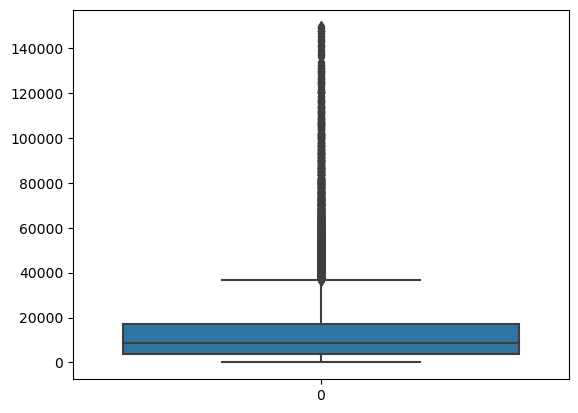

In [180]:
sns.boxplot(df_clean.revol_bal)


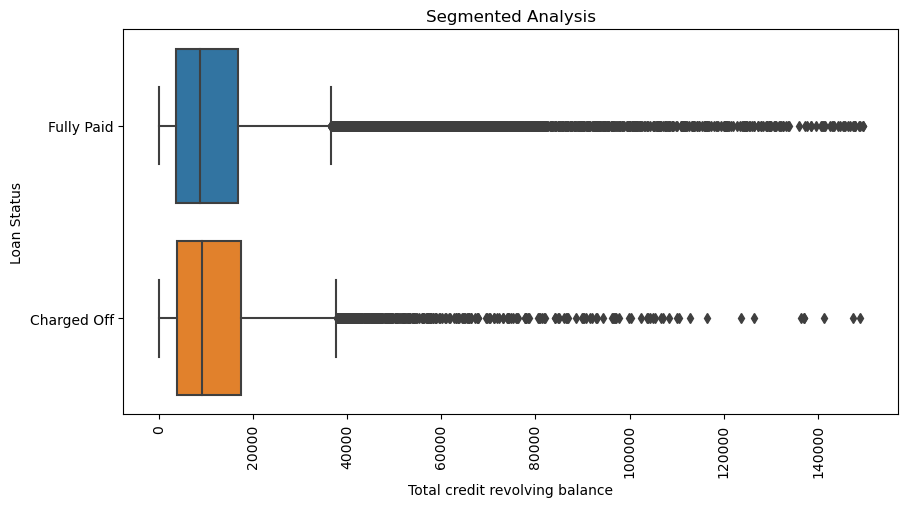

In [181]:
# Box plot to analyze how dti can affect the loan getting defaulted.

boxplot(df_clean, xlabel='Total credit revolving balance', ylabel="Loan Status", title="Segmented Analysis" , xattr=attr,yattr="loan_status")

### Analysis -

- Total credit revolving balance has no effect on Charged off loan account count %.

### 10. revol_util

- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.



In [182]:
df_clean.revol_util.info()

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype 
--------------  ----- 
38527 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [183]:
df_c1 = df_clean[~df_clean.revol_util.isna()]

In [184]:
df_c1["revol_util_mod"]= df_c1["revol_util"].apply(lambda x: float(x.split('%')[0]))

In [185]:
# Create a derived column "revol_util_bal" which is to extract the revolving credit balance utilized for this loan 

df_c1["revol_util_bal"]=(df_c1["revol_util_mod"]*df_c1["revol_bal"])/100

In [186]:
df_c1.revol_util_bal.value_counts()

0.000        1032
2.980           9
2.422           8
22.506          8
2.040           8
             ... 
29328.655       1
9160.679        1
3404.250        1
5319.486        1
2150.125        1
Name: revol_util_bal, Length: 36867, dtype: int64

<Axes: >

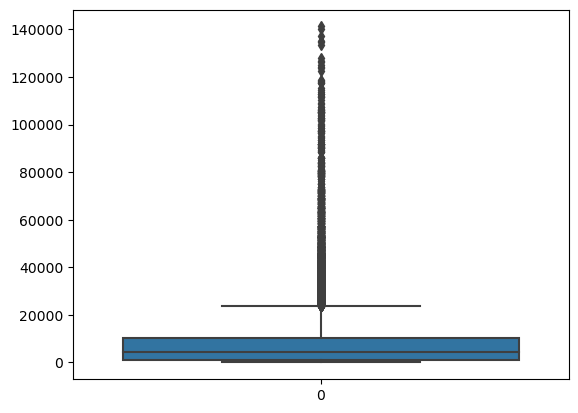

In [187]:
sns.boxplot(df_c1.revol_util_bal)

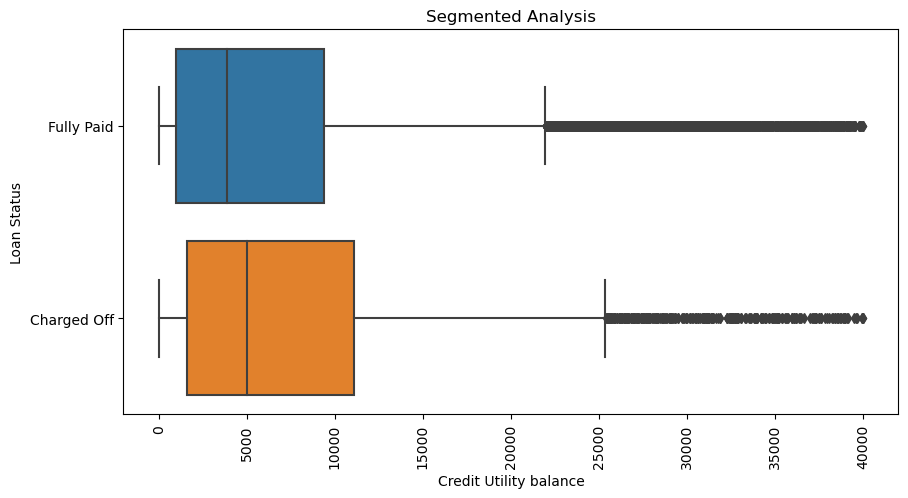

In [188]:
# Box plot to analyze how dti can affect the loan getting defaulted.

boxplot(df_c1[df_c1.revol_util_bal<40000], xlabel='Credit Utility balance', ylabel="Loan Status", title="Segmented Analysis" , xattr="revol_util_bal",yattr="loan_status")

In [189]:


df_c1[df_c1["loan_status"] == "Charged Off"].revol_util_bal.describe()


count      5611.000000
mean       8735.111521
std       10966.090612
min           0.000000
25%        1651.691500
50%        5267.682000
75%       11597.900000
max      117677.672000
Name: revol_util_bal, dtype: float64

In [190]:
df_c1[df_c1["loan_status"] == "Fully Paid"].revol_util_bal.describe()

count     32916.000000
mean       7682.780184
std       11122.606409
min           0.000000
25%        1027.930250
50%        4064.690500
75%        9882.913000
max      141211.072000
Name: revol_util_bal, dtype: float64

#### Analysis:

# TODO

### 11. pub_rec_bankruptcies

- Number of public record bankruptcies

- <b><i>This is a ordered categorical variable.</i></b>

In [191]:
df_clean.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [192]:
attr = 'pub_rec_bankruptcies'

In [193]:
df_prb = df_clean[~(df_clean.pub_rec_bankruptcies.isna())]

In [194]:
df_prb.pub_rec_bankruptcies = df_prb.apply(lambda x: int(x.pub_rec_bankruptcies), axis=1)

In [195]:
df_prb.pub_rec_bankruptcies.value_counts()

0    36238
1     1637
2        5
Name: pub_rec_bankruptcies, dtype: int64

<Figure size 1000x500 with 0 Axes>

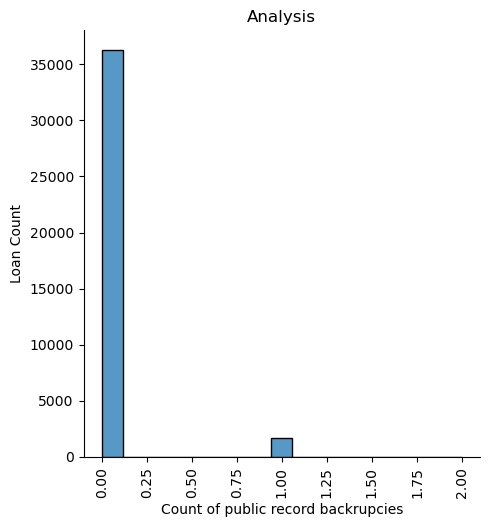

In [196]:
# Graph to Loan account counts against the count of months since last deliquency
distplot(df_prb, xattr=attr, xlabel="Count of public record backrupcies", ylabel="Loan Count", title="Analysis", isKDE=False)



   pub_rec_bankruptcies  charged off  fully paid  charged off percentage
0                     0         5141       31097               14.186765
1                     1          366        1271               22.357972
2                     2            2           3               40.000000


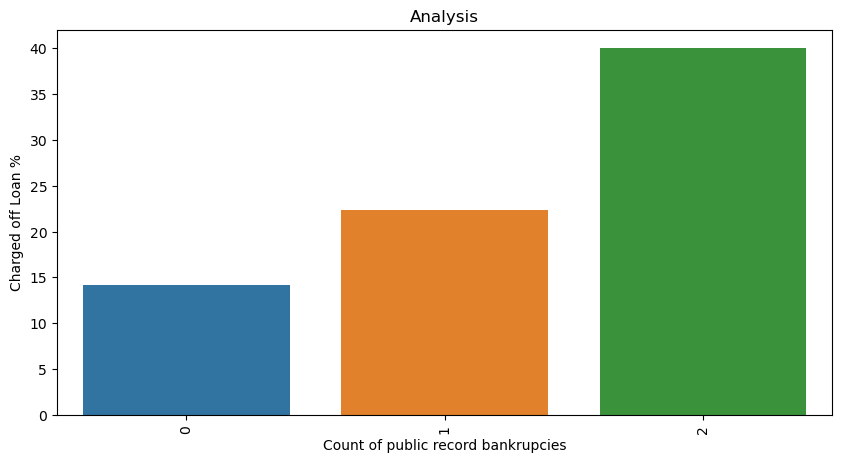

In [197]:
df_co = chargedOffLoanPercentageUnivariate(df_prb, attr)

# Box plot to analyze how loan category can affect the loan status getting defaulted.

barplot(df_co, xattr=attr, yattr="charged off percentage", xlabel="Count of public record bankrupcies", ylabel="Charged off Loan %", title="Analysis")

### Analysis:

- <b><i>Clearly with the increase in count of public record bankruptcies, the Charged off loan % increases.

#### 1. collection_recovery_fee - This is post charge off collection fee

In [167]:
df_clean.collection_recovery_fee.describe()

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

In [168]:
df_clean.shape

(39717, 48)

Since this field signifies the recovery amount which is collected after the chargeoff, this does not have to do anything with analysis.
So this field can be dropped.

In [169]:
df_clean.drop(columns="collection_recovery_fee", inplace=True)

In [170]:
df_clean.shape

(39717, 47)

#### delinq_2yrs

- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

- <b><i>This is a ordered categorical variable.</i></b>

In [181]:
df_clean.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11])

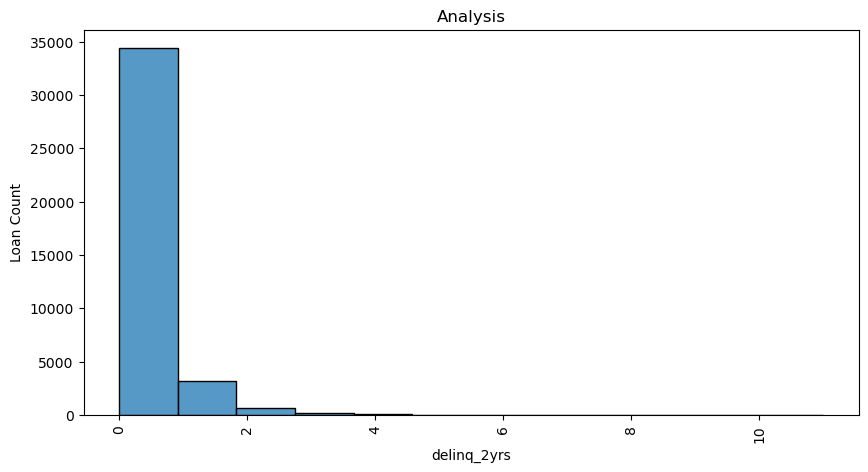

In [838]:
# Shows the distrbution of loan count vs delinq_2yrs

histogram(df_clean, xattr="delinq_2yrs", xlabel="delinq_2yrs", ylabel="Loan Count", title="Analysis", isKDE=False, bins=12)

In [839]:
df_clean.groupby(by="delinq_2yrs", sort=True)["delinq_2yrs"].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

,delinq_2yrs,Count
0,0,34386
1,1,3207
2,2,673
3,3,212
4,4,60
5,5,21
6,6,10
7,7,4
8,8,2
9,9,1


<b>This analysis shows that maximum loan applications donot have delinquency instances. And number of loan application decreases with increase in deliquency instances.</b>

In [124]:
df_clean.delinq_2yrs.describe()

count    37874.000000
mean         0.144954
std          0.490078
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [841]:
df_deq= df_clean[df_clean.delinq_2yrs>0]

<Axes: xlabel='loan_status', ylabel='delinq_2yrs'>

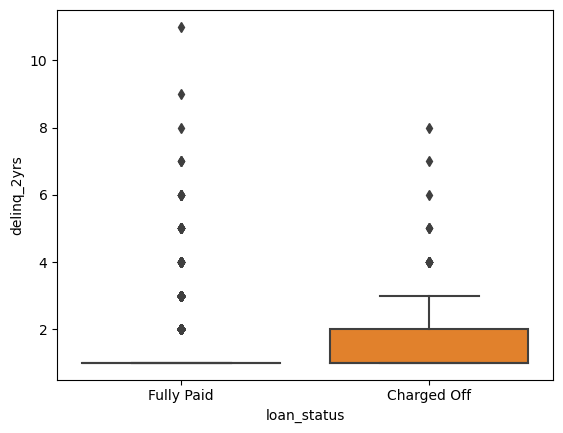

In [843]:
sns.boxplot(data=df_deq, y="delinq_2yrs", x="loan_status")

The boxplot shows that borrowers who have atleast one instance of delinquency for monthly emi in the last 2 years. It shows there is no clear demarkation of borrowers as they can either turn out to be finally non-defaulter or defaulter. Though there is greater chance to charged off in case borrowers have 1-2 instances of default in the last 2 years. 

#### loan_amnt

- The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- <b><i>This is a quantitative categorical variable.</i></b>

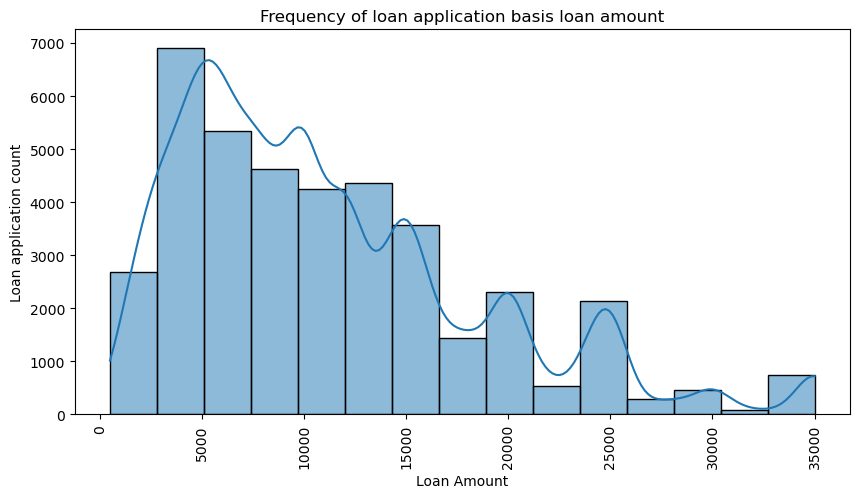

In [193]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="loan_amnt", bins=15, kde=True)
plt.xticks(rotation=90)
plt.xlabel("Loan Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis loan amount")
plt.show()

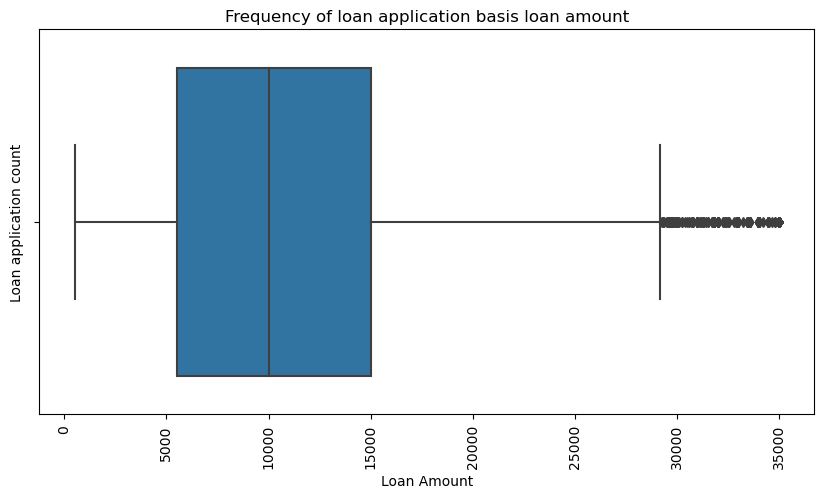

In [197]:
# Box Plot

plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x="loan_amnt")
plt.xticks(rotation=90)
plt.xlabel("Loan Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis loan amount")
plt.show()

In [196]:
df_clean.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [215]:
#Analysis of Loan Amount
print("Analysis")
print("1. Median loan amount: ", np.quantile(df_clean.loan_amnt, 0.5))
print("2. IQR of loan amount: ", np.quantile(df_clean.loan_amnt, 0.25),"(25%)-",np.quantile(df_clean.loan_amnt, 0.75),"(75%)")
print("3. Min loan amount: ", np.quantile(df_clean.loan_amnt, 0))
print("4. Max loan amount: ", np.quantile(df_clean.loan_amnt, 1))
print("5. Density distribution of loan amount is maximum in the range around ",np.quantile(df_clean.loan_amnt, 0.25),"-",np.quantile(df_clean.loan_amnt, 0.75))

Analysis
1. Median loan amount:  10000.0
2. IQR of loan amount:  5500.0 (25%)- 15000.0 (75%)
3. Min loan amount:  500
4. Max loan amount:  35000
5. Density distribution of loan amount is maximum in the range around  5500.0 - 15000.0


In [217]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### funded_amnt

- The total amount committed to that loan at that point in time.

- <b><i>This is a quantitative categorical variable.</i></b>

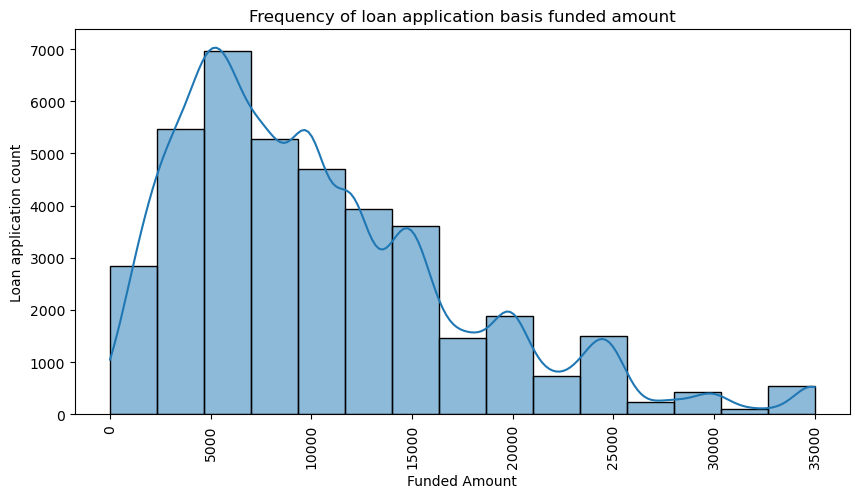

In [222]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="funded_amnt", bins=15, kde=True)
plt.xticks(rotation=90)
plt.xlabel("Funded Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis funded amount")
plt.show()

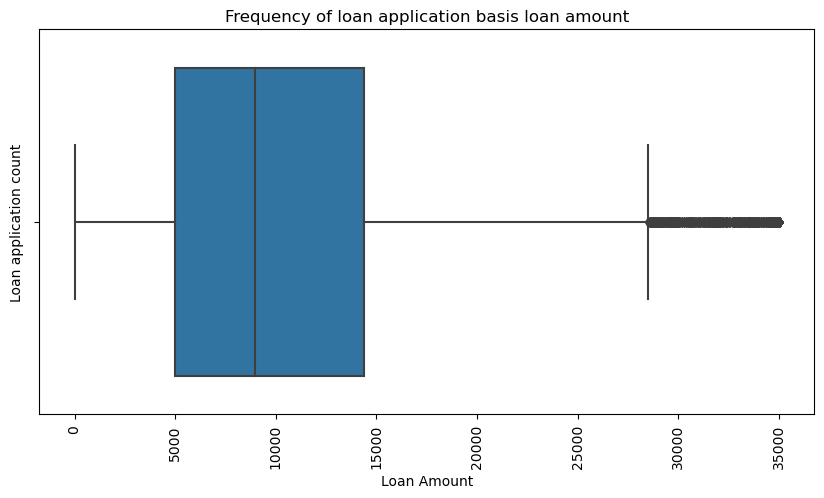

In [223]:
# Box Plot

plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x="funded_amnt")
plt.xticks(rotation=90)
plt.xlabel("Loan Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis loan amount")
plt.show()

In [221]:
#Analysis of Funded Amount
print("Analysis of Funded Amount")
print("1. Median: ", np.quantile(df_clean.funded_amnt, 0.5))
print("2. IQR: ", np.quantile(df_clean.funded_amnt, 0.25),"(25%)-",np.quantile(df_clean.funded_amnt, 0.75),"(75%)")
print("3. Min: ", np.quantile(df_clean.funded_amnt, 0))
print("4. Max: ", np.quantile(df_clean.funded_amnt, 1))
print("5. As per displot, Density distribution is maximum in the range around ",np.quantile(df_clean.funded_amnt, 0.25),"-",np.quantile(df_clean.funded_amnt, 0.75))

Analysis of Funded Amount
1. Median:  9600.0
2. IQR:  5400.0 (25%)- 15000.0 (75%)
3. Min:  500
4. Max:  35000
5. Density distribution is maximum in the range around  5400.0 - 15000.0


In [225]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Term

- The number of payments on the loan. Values are in months and can be either 36 or 60.

- <b><i>This is a ordered categorical variable.</i></b>

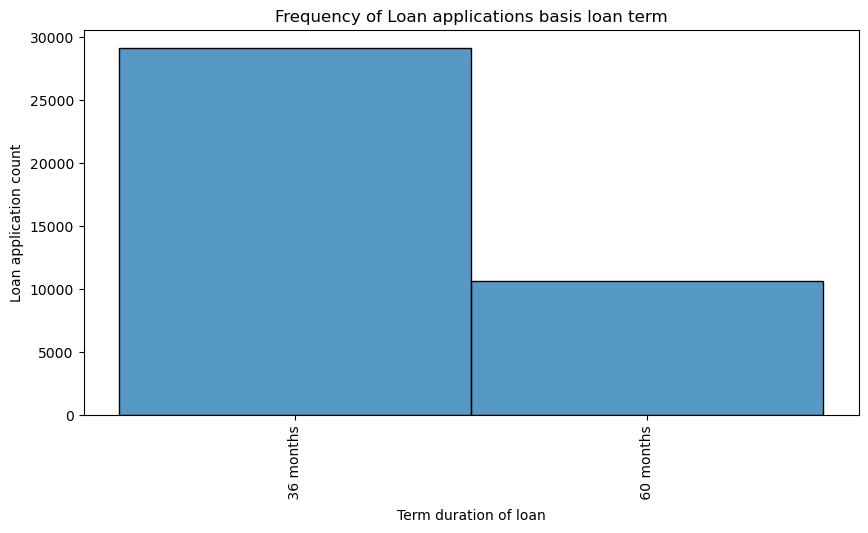

In [226]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="term")
plt.xticks(rotation=90)
plt.xlabel("Term duration of loan")
plt.ylabel("Loan application count")
plt.title("Frequency of Loan applications basis loan term")
plt.show()

#### Analysis

- More loans are for a period of 36 months compared to 60 months

#### int_rate

- Interest Rate on the loan

- <b><i>This is a ordered categorical variable.</i></b>

In [239]:
# Checking the unique values of interest rate

df_clean.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [258]:
# Converting interest rate to a integer by data manipulation(removing % and rounding off to nearest integer)
# Adding a new interest rate column

df_clean["int_rate_round"] = df_clean.int_rate.apply(lambda x: int(np.round(float(x.replace("%",'')))))

In [259]:
# Fetch all unique interest rate values

df_clean.int_rate_round.unique()

array([11, 15, 16, 13,  8, 19, 21, 10,  6, 12, 14, 17,  9, 18,  7, 20, 22,
       24, 23,  5, 25])

In [260]:
df_clean.int_rate_round.head()

0    11
1    15
2    16
3    13
4    13
Name: int_rate, dtype: int64

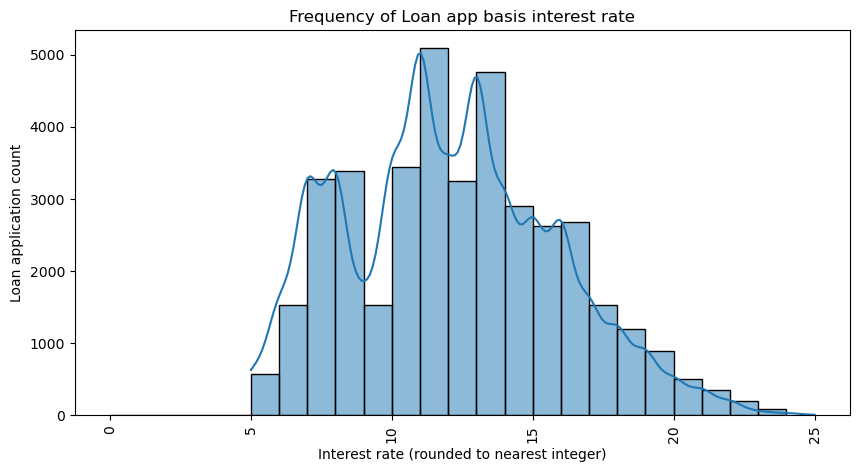

In [263]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="int_rate_round", bins=np.arange(0,25), kde=True)
plt.xticks(rotation=90)
plt.xlabel("Interest rate (rounded to nearest integer)")
plt.ylabel("Loan application count")
plt.title("Frequency of Loan app basis interest rate")
plt.show()

In [268]:
df_clean.int_rate_round.describe()

count    39717.000000
mean        12.011229
std          3.717187
min          5.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         25.000000
Name: int_rate, dtype: float64

#### Analysis

- Maximum loan application have rounded interest rate ranging from 7% to 16% as found in the above distrbution plot.

In [270]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'int_rate_round'],
      dtype='object')

In [271]:
df_clean.installment.unique()

array([162.87,  59.83,  84.33, ...,  78.42, 275.38, 255.43])

In [272]:
df_clean.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64